# Histogram Backprojection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns

from custom_utils import *

In [3]:

# roi object we need to find
roi = cv.imread('../data/redball1.png')
hsv = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

# target is the image we search in
#   hold on is this AI already?
target = cv.imread('../data/redball2.jpeg')
hsvt = cv.cvtColor(target, cv.COLOR_BGR2HSV)


## Numpy Implementation

An important observation here is that, the roi (picture of ball) has a
small region that lits up - and similarly, in the target, we also have
a similar region that lits up.

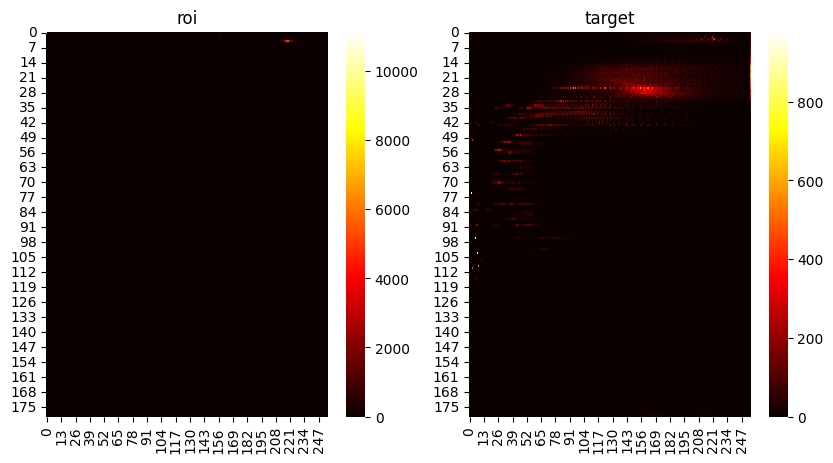

In [4]:
# calculating the 2D histogram
M = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
I = cv.calcHist([hsvt], [0, 1], None, [180, 256], [0, 180, 0, 256])

titles = ['roi', 'target']
_, ax = plt.subplots(1, 2, figsize = (10, 5))
for i, im in enumerate([M, I]):
    sns.heatmap(im, ax = ax[i], cmap = 'hot')
    ax[i].set_title(titles[i])
plt.show()

/tmp/ipykernel_7702/1047748128.py:1: RuntimeWarning: divide by zero encountered in divide
  R = M/I
/tmp/ipykernel_7702/1047748128.py:1: RuntimeWarning: invalid value encountered in divide
  R = M/I


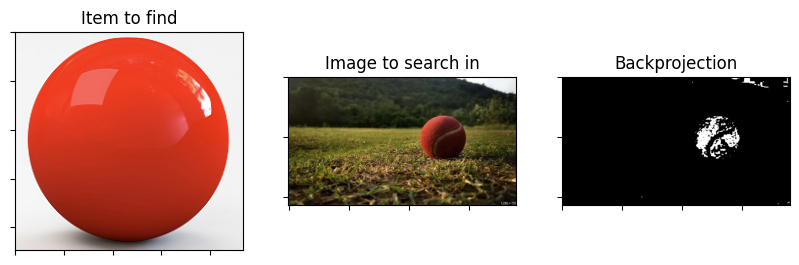

In [16]:
R = M/I
h, s, v = cv.split(hsvt)
B = R[h.ravel(), s.ravel()]
B = np.minimum(B, 1)
B = B.reshape(hsvt.shape[:2])
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(B, -1, disc, B)
B = np.uint8(B)
cv.normalize(B, B, 0, 255, cv.NORM_MINMAX)

_, thresh = cv.threshold(B, 50, 255, 0)

titles = [
    'Item to find', 'Image to search in', 'Backprojection'
]
_, ax = plt.subplots(1, 3, figsize = (10, 5))
for i, im in enumerate([
    cv.cvtColor(roi, cv.COLOR_BGR2RGB),
    cv.cvtColor(hsvt, cv.COLOR_HSV2RGB),
    cv.cvtColor(thresh, cv.COLOR_GRAY2RGB),
    ]):
    show_image(im, ax = ax[i], title=titles[i])

plt.show()

## OpenCV Implementation

In [19]:
# calculating object histogram
roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256])

# normalize histogram and apply backprojection
# because the histogram counts the number of occurence, it will ammount to roihist.size
cv.normalize(roihist, roihist, 0, 255, cv.NORM_MINMAX)
dst = cv.calcBackProject([hsvt], [0, 1], roihist, [0, 180, 0, 256], 1)

# Now convolute with circular disc
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst, -1, disc, dst)



array([[254.99998,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ]], dtype=float32)